# pandas

## index format

In [4]:
import pandas as pd
df=pd.DataFrame(range(4),index=['2017-03-01','2017-03-31','2017-04-06','2017-05-10'])
df

,0
2017-03-01,0
2017-03-31,1
2017-04-06,2
2017-05-10,3


In [5]:
df.index[0]

'2017-03-01'

### convert the pandas index into datetime

In [6]:
df.index=pd.to_datetime(df.index)
df.index[0]

Timestamp('2017-03-01 00:00:00')

### change the freqence of the dataframe

In [7]:
df.resample('M').last()

,0
2017-03-31,1
2017-04-30,2
2017-05-31,3


### convert the period of the dataframe

In [8]:
df.index.to_period('M')

PeriodIndex(['2017-03', '2017-03', '2017-04', '2017-05'], dtype='period[M]', freq='M')

### convert between monthEnd and monthBegin

In [11]:
df.index.to_period('M').to_timestamp('M')

DatetimeIndex(['2017-03-31', '2017-03-31', '2017-04-30', '2017-05-31'], dtype='datetime64[ns]', freq=None)

### parse dates using read_csv
`df=pd.read_csv(filepath,index_col=0,parse_dates=True)`

## `reset_index()`
`df=df.reset_index(drop=True)`

## binning data `qcut` and `cut`

Both `qcut` and `cut` in pandas methods can be used to binning data.When `qcut` is used,the bins will be choosen so that you have the same number of records in each bin.However `cut` will choose the bins to be evenly spaced according the values themselves and not the frequencies of those values

In [25]:
import pandas as pd

df=pd.DataFrame({'values':[25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]})
df

,values
0,25
1,94
2,57
3,62
4,70
5,25
6,94
7,57
8,62
9,70


In [32]:
bins=[0,25,50,75,100]
group_names=['Low','Okey','Good','Great']
categories=pd.cut(df['values'],bins,labels=group_names)
categories

0       Low
1     Great
2      Good
3      Good
4      Good
5       Low
6     Great
7      Good
8      Good
9      Good
10     Good
11     Good
Name: values, dtype: category
Categories (4, object): [Low < Okey < Good < Great]

In [33]:
pd.cut(df['values'],4)

0     (24.931, 42.25]
1         (76.75, 94]
2       (42.25, 59.5]
3       (59.5, 76.75]
4       (59.5, 76.75]
5     (24.931, 42.25]
6         (76.75, 94]
7       (42.25, 59.5]
8       (59.5, 76.75]
9       (59.5, 76.75]
10      (59.5, 76.75]
11      (59.5, 76.75]
Name: values, dtype: category
Categories (4, object): [(24.931, 42.25] < (42.25, 59.5] < (59.5, 76.75] < (76.75, 94]]

In [34]:
pd.cut(df['values'],4).value_counts()

(59.5, 76.75]      6
(76.75, 94]        2
(42.25, 59.5]      2
(24.931, 42.25]    2
Name: values, dtype: int64

In [35]:
pd.qcut(df['values'],4)

0     [25, 57]
1     (70, 94]
2     [25, 57]
3     (57, 62]
4     (62, 70]
5     [25, 57]
6     (70, 94]
7     [25, 57]
8     (57, 62]
9     (62, 70]
10    (57, 62]
11    (62, 70]
Name: values, dtype: category
Categories (4, object): [[25, 57] < (57, 62] < (62, 70] < (70, 94]]

In [36]:
pd.qcut(df['values'],4).value_counts()

[25, 57]    4
(62, 70]    3
(57, 62]    3
(70, 94]    2
Name: values, dtype: int64

In [29]:
df['categories'] = pd.cut(df['values'], bins, labels=group_names)
df['scoresBinned'] = pd.cut(df['values'], bins)
df

,values,categories,scoresBinned
0,25,Low,"(0, 25]"
1,94,Great,"(75, 100]"
2,57,Good,"(50, 75]"
3,62,Good,"(50, 75]"
4,70,Good,"(50, 75]"
5,25,Low,"(0, 25]"
6,94,Great,"(75, 100]"
7,57,Good,"(50, 75]"
8,62,Good,"(50, 75]"
9,70,Good,"(50, 75]"


In [23]:
pd.value_counts(df['categories'])

Good     8
Great    2
Low      2
Okey     0
Name: categories, dtype: int64

In [30]:
df.groupby('categories').size()

categories
Low      2
Okey     0
Good     8
Great    2
dtype: int64

## change the order of the columns

`df = df.reindex_axis(['mean',0,1,2,3,4], axis=1)` 

or

```
cols = cols[-1:] + cols[:-1]
df = df[cols]
```

delete columns

```python
df=df.drop('colname',axis=1)
df.drop('colname',inplace=True)

df.drop(df.columns[[0,3,9]],axis=1,inplace=True)
```

## iterater over rows
use `iterrows()` or `itertuples()`,and `itertuples()` can be faster:
```python
for index,row in df.iterrows():
    pass
```

```python
for index,row in df.itertuples():
    pass
```

## some useful functions
`np.apply_over_axes`:Apply a function repeatedly over multiple axes.


`df.columns.values.tolist()`

`df.to_csv(file_name, sep='\t', encoding='utf-8')`

`df[colname].fillna(3.0,inplace=True)`

## `apply`,`applymap` and `map`
`apply` works on a row/column basis of a DataFrame,`applymap` works element-wise on a DataFrame,and `map` works on element-wise on a Series.

In [58]:
import numpy as np
import pandas as pd
df=pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), 
                 index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df

,b,d,e
Utah,-0.625812,0.641039,-1.776212
Ohio,1.783508,-0.069179,0.710979
Texas,-1.211665,-0.083823,0.175521
Oregon,-1.847957,2.158905,-0.315971


In [59]:
f=lambda x:x.max()-x.min()
df.apply(f,axis=0)

b    3.631465
d    2.242728
e    2.487192
dtype: float64

In [60]:
df.apply(f,axis=1)

Utah      2.417251
Ohio      1.852686
Texas     1.387186
Oregon    4.006862
dtype: float64

In [40]:
format=lambda x:'%.2f'%x
df.applymap(format)

,b,d,e
Utah,2.81,-0.66,-1.45
Ohio,-0.56,-0.33,0.84
Texas,-0.28,1.17,2.01
Oregon,-0.73,-1.72,1.42


In [41]:
df['e'].map(format)

Utah      -1.45
Ohio       0.84
Texas      2.01
Oregon     1.42
Name: e, dtype: object

## `iloc`,`loc`,`iat`,`at`

### `loc`-label based
Allows you to pass 1-D arrays as indexes.Arrays can be either slices (subsets) of the index or column,or they can be boolean arrays which are equal in length to the index of columns.

**Special note:**when a scalar indexer is passed,`loc` can assign a new index or column value that didn't exist before.

`df.loc[df.index[2],'colname']=3 `

`df.loc[df.index[1:3],'colname']=3`

`df.loc[df['colname1']<0.0,'colname2']=value`

### `iloc`-position based

Similar to `loc` except with positions rather than index values.However,you **cannot** assign new columns or indices.

`df.iloc[2,df.columns.get_loc('colname')]=3`

`df.iloc[2,4]=3`

`df.iloc[:3,2:4]=3`

### `at`-label based

Works very similar to `loc` for scalar indexes.**Cannot** operate on array indexes.**Can** assign new indices and columns.

**Advantage** over `loc` is that this is faster.

**Disadvantage** is that you can't use arrays for indexers.

`df.at[df.index[2],'colname']=3`

`df.at['c','colname']=3`

### `iat`-position based

Works similarly to `iloc`.**Cannot** work in array indexers.**Cannot** assign new indices and columns.

**Advantage** over `iloc` is that this is faster.

**Disadvantage** is that you can't use arrays for indexers.

`IBM.iat[2,IBM.columns.get_loc('PNL')]=3`

## Filtration

### select rows from DataFrame based on values in a column
equal a value:

`df.loc[df['colname']==some_value]`

in some values:

`df.loc[df['colname'].isin(some_values)]`

combine multiple condition with `&`:

`df.loc[(df['colname']==some_value) & (df['otherColname'].isin(some_values)]`

do not equal:

`df.loc[df['colname']!=some_value]`

not in some values:

`df.loc[~df['colname'].isin(some_values)]`


### drop rows of DataFrame whose value in certain column is NaN
1. `df=df[np.isfinite(df['colname'])]`
2. `df=df.dropna(subset=[1])`
3. `df=df[pd.notnull(df['colname'])]`

### 'Chained' filter

In [43]:
df = pd.DataFrame(np.random.randint(0, 10, (4,4)), index=list('abcd'), columns=list('ABCD'))
df

,A,B,C,D
a,9,0,9,6
b,5,2,1,4
c,9,7,0,6
d,6,3,5,5


In [46]:
df[(df.A==9)&(df.C==0)]

,A,B,C,D
c,9,7,0,6


### mask method

In [48]:
def mask(df,key,value):
    return df[df[key]==value]

pd.DataFrame.mask=mask

df.mask('A',9)

,A,B,C,D
a,9,0,9,6
c,9,7,0,6


In [49]:
df.mask('A',9).mask('B',7)

,A,B,C,D
c,9,7,0,6


### generalizing the mask function

In [51]:
def mask1(df,f):
    return df[f(df)]
pd.DataFrame.mask=mask1

In [52]:
df.mask(lambda x:x.iloc[:,0]>=6).mask(lambda x:x.iloc[:,1]<5)

,A,B,C,D
a,9,0,9,6
d,6,3,5,5


### query

In [54]:
df.query('A>=6').query('B<5')

,A,B,C,D
a,9,0,9,6
d,6,3,5,5


In [55]:
df.query('A>0 and 0<B<5')

,A,B,C,D
b,5,2,1,4
d,6,3,5,5


### select by partial string
`df[df['A'].str.contains('hello')]`

## drop
`df.drop(df.index[[1,3]],inplace=True)`

## `date_range`

In [61]:
import datetime
import numpy as np
import pandas as pd

date_today=datetime.datetime.now().date()
index=pd.date_range(date_today-datetime.timedelta(10),periods=10,
                   freq='D')
index

DatetimeIndex(['2017-10-13', '2017-10-14', '2017-10-15', '2017-10-16',
               '2017-10-17', '2017-10-18', '2017-10-19', '2017-10-20',
               '2017-10-21', '2017-10-22'],
              dtype='datetime64[ns]', freq='D')

## `NaN`

In [63]:
s=pd.Series([1,2,3,np.nan,np.nan])
s.isnull()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [64]:
s.isnull().sum()

2

In [65]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
dtype: bool

## Combine two column of text

In [66]:
df=pd.DataFrame({'year':['2014','2015'],'quarter':['q1','q2']})
df['period']=df[['year','quarter']].apply(lambda x:''.join(x),axis=1)
df

,quarter,year,period
0,q1,2014,2014q1
1,q2,2015,2015q2


In [67]:
df['period1']=df['year'].map(str)+df['quarter']
df

,quarter,year,period,period1
0,q1,2014,2014q1,2014q1
1,q2,2015,2015q2,2015q2


## `groupby`
By 'goupy by' we are referring to a process involving one or more of the following steps:
1. **Splitting** the data into groups based on some critera
2. **Applying** a function on each group independently
3. **Combining** the results into a data structure

In [210]:
import numpy as np
import pandas as pd

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Splitting

```python
#default is axis=0
g=obj.groupby(key)
g=obj.groupby(key,axis=1)
g=obj.groupby([key1,key2])
```

In [69]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                           'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.803091,0.377761
1,bar,one,-0.429054,-1.342153
2,foo,two,-2.233099,0.017224
3,bar,three,0.888053,0.014602
4,foo,two,-0.304456,0.820069
5,bar,two,1.440747,-0.181247
6,foo,one,1.046014,0.893388
7,foo,three,-0.252451,-0.929354


In [71]:
g=df.groupby('A')
g.first()

,B,C,D
A,,,
bar,one,-0.429054,-1.342153
foo,one,-0.803091,0.377761


### Groupby sorting
By default the **groupby keys** are sorted during the `groupby`operation.You may however pass `sort=False` for potential speedups:

In [73]:
df2=pd.DataFrame({'X' : ['B', 'B', 'A', 'A'], 'Y' : [1, 2, 3, 4]})
df2

,X,Y
0,B,1
1,B,2
2,A,3
3,A,4


In [74]:
df2.groupby(['X']).sum()

,Y
X,
A,7
B,3


In [75]:
df2.groupby(['X'],sort=False).sum()

,Y
X,
B,3
A,7


Note that `groupby` will preserve the order in which **observations** are sorted within each group.For example,the groups created by `groupby` below are in the order they appeared in the original `DataFrame`:

In [76]:
df3 = pd.DataFrame({'X' : ['A', 'B', 'A', 'B'], 'Y' : [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [78]:
df3.groupby('X').get_group('A')

,X,Y
0,A,1
2,A,3


### Groupby object attributes
The `groups` attribute is a dict whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group.

In [79]:
df

,A,B,C,D
0,foo,one,-0.803091,0.377761
1,bar,one,-0.429054,-1.342153
2,foo,two,-2.233099,0.017224
3,bar,three,0.888053,0.014602
4,foo,two,-0.304456,0.820069
5,bar,two,1.440747,-0.181247
6,foo,one,1.046014,0.893388
7,foo,three,-0.252451,-0.929354


In [80]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [82]:
df.groupby(['A','B']).groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [88]:
import pdir
pdir(g)

abstract class:
    __subclasshook__
attribute access:
    __delattr__, __dir__, __getattr__, __getattribute__, __setattr__
emulating container:
    __getitem__, __iter__, __len__
object customization:
    __bytes__, __format__, __hash__, __init__, __new__, __repr__, __sizeof__, __str__
other:
    A, B, C, D, _agg_doc, _apply_whitelist, _block_agg_axis, _builtin_table, _cython_table, _def_str, _group_selection, _internal_names, _internal_names_set, _see_also_template, _selection
pickle:
    __reduce__, __reduce_ex__
special attribute:
    __class__, __dict__, __doc__, __module__, __weakref__
descriptor:
    _constructor: @property with getter, class constructor (for this class it's just `__class__`
    _obj_with_exclusions: class cache_readonly with getter, setter, deleter
    _selected_obj: class cache_readonly with getter, setter, deleter
    _selection_list: @property with getter
    dtypes: @property with getter, Return the dtypes in this object.
    groups: @property with getter, 

### Groupby with multiindex

In [91]:
df

,A,B,C,D
0,foo,one,-0.803091,0.377761
1,bar,one,-0.429054,-1.342153
2,foo,two,-2.233099,0.017224
3,bar,three,0.888053,0.014602
4,foo,two,-0.304456,0.820069
5,bar,two,1.440747,-0.181247
6,foo,one,1.046014,0.893388
7,foo,three,-0.252451,-0.929354


In [92]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.429054 -1.342153
    three  0.888053  0.014602
    two    1.440747 -0.181247
foo one    0.242923  1.271149
    three -0.252451 -0.929354
    two   -2.537555  0.837293

### Iterating through groups

In [93]:
g=df.groupby('A')
for name,group in g:
    print name
    print group

bar
     A      B         C         D
1  bar    one -0.429054 -1.342153
3  bar  three  0.888053  0.014602
5  bar    two  1.440747 -0.181247
foo
     A      B         C         D
0  foo    one -0.803091  0.377761
2  foo    two -2.233099  0.017224
4  foo    two -0.304456  0.820069
6  foo    one  1.046014  0.893388
7  foo  three -0.252451 -0.929354


In the case of grouping by multiple keys,the group name will be a tuple:

In [94]:
for name,group in df.groupby(['A','B']):
    print name
    print group


('bar', 'one')
     A    B         C         D
1  bar  one -0.429054 -1.342153
('bar', 'three')
     A      B         C         D
3  bar  three  0.888053  0.014602
('bar', 'two')
     A    B         C         D
5  bar  two  1.440747 -0.181247
('foo', 'one')
     A    B         C         D
0  foo  one -0.803091  0.377761
6  foo  one  1.046014  0.893388
('foo', 'three')
     A      B         C         D
7  foo  three -0.252451 -0.929354
('foo', 'two')
     A    B         C         D
2  foo  two -2.233099  0.017224
4  foo  two -0.304456  0.820069


### Selecting a group
A single group can be selected using `GroupBy.get_group()`:

In [95]:
g.get_group('bar')

,A,B,C,D
1,bar,one,-0.429054,-1.342153
3,bar,three,0.888053,0.014602
5,bar,two,1.440747,-0.181247


In [96]:
df.groupby(['A','B']).get_group(('bar','one'))

,A,B,C,D
1,bar,one,-0.429054,-1.342153


### Aggregation
These operations are similar to the `aggregating API`

In [99]:
g.agg(np.sum)

,C,D
A,,
bar,1.899745,-1.508797
foo,-2.547084,1.179088


In [102]:
g1=df.groupby(['A','B'])
g1.agg(np.sum)

C         D
A   B                        
bar one   -0.429054 -1.342153
    three  0.888053  0.014602
    two    1.440747 -0.181247
foo one    0.242923  1.271149
    three -0.252451 -0.929354
    two   -2.537555  0.837293

In the case of multiple keys,the result is a MultiIndex by default,though this can be changed by using the `as_index` option.

In [103]:
g1=df.groupby(['A','B'],as_index=False)
g1.agg(np.sum)

,A,B,C,D
0,bar,one,-0.429054,-1.342153
1,bar,three,0.888053,0.014602
2,bar,two,1.440747,-0.181247
3,foo,one,0.242923,1.271149
4,foo,three,-0.252451,-0.929354
5,foo,two,-2.537555,0.837293


Note that you could use the `reset_index` DataFrame function to achieve the same result as the column names are stored in the resulting `MultiIndex`:

In [104]:
df.groupby(['A','B']).sum().reset_index()

,A,B,C,D
0,bar,one,-0.429054,-1.342153
1,bar,three,0.888053,0.014602
2,bar,two,1.440747,-0.181247
3,foo,one,0.242923,1.271149
4,foo,three,-0.252451,-0.929354
5,foo,two,-2.537555,0.837293


### `size` 
It returns a Series

In [106]:
g1.size()

A    B    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

### `describe`

In [107]:
g.describe()

C         D
A                            
bar count  3.000000  3.000000
    mean   0.633248 -0.502932
    std    0.960590  0.733354
    min   -0.429054 -1.342153
    25%    0.229499 -0.761700
    50%    0.888053 -0.181247
    75%    1.164400 -0.083322
    max    1.440747  0.014602
foo count  5.000000  5.000000
    mean  -0.509417  0.235818
    std    1.181602  0.741503
    min   -2.233099 -0.929354
    25%   -0.803091  0.017224
    50%   -0.304456  0.377761
    75%   -0.252451  0.820069
    max    1.046014  0.893388

### Applying multiple functions at once

In [108]:
for name,group in g:
    print name
    print group

bar
     A      B         C         D
1  bar    one -0.429054 -1.342153
3  bar  three  0.888053  0.014602
5  bar    two  1.440747 -0.181247
foo
     A      B         C         D
0  foo    one -0.803091  0.377761
2  foo    two -2.233099  0.017224
4  foo    two -0.304456  0.820069
6  foo    one  1.046014  0.893388
7  foo  three -0.252451 -0.929354


In [110]:
g['C'].agg([np.sum,np.mean,np.std])

,sum,mean,std
A,,,
bar,1.899745,0.633248,0.960590
foo,-2.547084,-0.509417,1.181602


In [109]:
g.agg([np.sum,np.mean,np.std])

C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  1.899745  0.633248  0.960590 -1.508797 -0.502932  0.733354
foo -2.547084 -0.509417  1.181602  1.179088  0.235818  0.741503

### Applying different functions to DataFrame columns

In [111]:
g.agg({'C':np.sum,
      'D':lambda x:np.std(x,ddof=1)})

,C,D
A,,
bar,1.899745,0.733354
foo,-2.547084,0.741503


### filtering

In [211]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])

def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

### `apply()`

In [212]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


### `nth()`

In [1]:
import pandas as pd
df = pd.DataFrame([[1, 2], [1, 4], [5, 6]], columns=['A', 'B'])
df

,A,B
0,1,2
1,1,4
2,5,6


In [2]:
g=df.groupby('A')
g.head(1)

,A,B
0,1,2
2,5,6


In [3]:
g.tail(1)

,A,B
1,1,4
2,5,6


In [4]:
g.nth(0)

,B
A,
1,2
5,6


In [5]:
g.nth(-1)

,B
A,
1,4
5,6


### plot

In [10]:
%matplotlib inline
import numpy as np
np.random.seed(1234)

df=pd.DataFrame(np.random.randn(50,2))
df['g']=np.random.choice(['A','B'],size=50)
df.loc[df['g']=='B',1]+=3
df.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

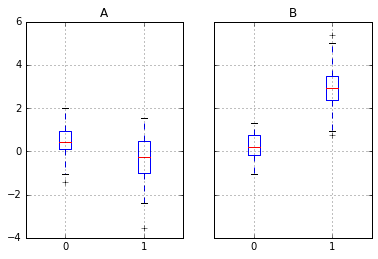

In [11]:
df.groupby('g').boxplot()

## Combining Datasets: `concat` and `append`
see ["Merge,join and concatenate" section](http://pandas.pydata.org/pandas-docs/stable/merging.html)  

For the convenience,we'll define this function which creates a `DataFrame` of a particular form that will be useful below:

In [112]:
def make_df(cols,ind):
    '''quickly make a DataFrame'''
    data={c:[str(c)+str(i) for i in ind]
         for c in cols}
    return pd.DataFrame(data,ind)

make_df('ABC',range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In addition,we'll create a quick class that allows us to display multiple `DataFrame`s side by side.The code makes use of the special `_repr_html_` method,which IPython uses to implement its rich object display:

In [118]:
class display(object):
    """Display HTML representation of multiple objects"""
    template="""<div style="float:left;padding:10px;">
    <p style='font-family:"Courier New",Courier,monospace'>{0}</p>{1}
    </div>"""
    
    def __init__(self,*args):
        self.args=args
    
    def _repr_html_(self):
        return '\n'.join(self.template.format(a,eval(a)._repr_html_())
                                             for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a+'\n'+repr(eval(a))
                          for a in self.args)

### Simple concatenation with `pd.concat`

`pd.concat()` can be used for a simple concatenation of `series` or `DataFrame` objects

In [119]:
df1=make_df('AB',[1,2])
df2=make_df('AB',[3,4])
display('df1','df2','pd.concat([df1,df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [120]:
display('df1','df2','pd.concat([df1,df2],axis=1)')

df1
    A   B
1  A1  B1
2  A2  B2

df2
    A   B
3  A3  B3
4  A4  B4

pd.concat([df1,df2],axis=1)
     A    B    A    B
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
3  NaN  NaN   A3   B3
4  NaN  NaN   A4   B4

In [123]:
df3=make_df('AB',[0,1])
df4=make_df('CD',[0,1])
display('df3','df4','pd.concat([df3,df4],axis=1)')

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3,df4],axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

### duplicate indices
Pandas concatenation **preserves indices**,even if the result will have duplicate indices!

In [124]:
x=make_df('AB',[0,1])
y=make_df('AB',[2,3])
y.index=x.index #make duplicate indices!
display('x','y','pd.concat([x,y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


Notice the repeated indices in the result.While this is valid within `DataFrame`s,the outcome is often undesirable.`pd.concat()` gives us a few ways to handle it.

#### Catching the repeats as an error
You can specify the `verify_integrity`flag.With this set to True,the concatenation will raise an exception if there are duplicate indices.

In [127]:
try:
    pd.concat([x,y],verify_integrity=True)
except ValueError as e:
        print "ValueError",e

ValueError Indexes have overlapping values: [0, 1]


#### Ignoring the index
This option can be specified using the `ignore_index` flag.

In [128]:
display('x','y','pd.concat([x,y],ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


#### Adding MultiIndex keys

In [129]:
display('x','y','pd.concat([x,y],keys=["x","y"])')

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x,y],keys=["x","y"])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

### Concatenation with joins

In [131]:
df5=make_df('ABC',[1,2])
df6=make_df('BCD',[2,3,4])
display('df5','df6','pd.concat([df5,df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
2  B2  C2  D2
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5,df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
2  NaN  B2  C2   D2
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [132]:
df7=make_df('ABC',[1,2])
df8=make_df('BC',[2,3,4])
display('df7','df8','pd.concat([df7,df8])')

df7
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df8
    B   C
2  B2  C2
3  B3  C3
4  B4  C4

pd.concat([df7,df8])
     A   B   C
1   A1  B1  C1
2   A2  B2  C2
2  NaN  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4

By default,the entries for which no data is available are filled with NA values.To cahnge this ,we can specify one of several options for the `join` and `join_axes` parameters of the concatenate function.By default,the join is a union of teh input columns (`join='outer'`),but we can change this to an intersection of the columns using `join='inner'`:

In [133]:
display('df5','df6','pd.concat([df5,df6],join="inner")')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
2  B2  C2  D2
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5,df6],join="inner")
    B   C
1  B1  C1
2  B2  C2
2  B2  C2
3  B3  C3
4  B4  C4

In [134]:
display('df5','df6','pd.concat([df5,df6],join="inner",axis=1)')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
2  B2  C2  D2
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5,df6],join="inner",axis=1)
    A   B   C   B   C   D
2  A2  B2  C2  B2  C2  D2

Another option is directly specify the index of the remaining columns using the `join_axes` argument,which takes a list of index objects.

In [135]:
display('df5','df6','pd.concat([df5,df6],join_axes=[df5.columns])')

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
2,B2,C2,D2
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
2,NaN,B2,C2


### `append()`

In [136]:
display('df1','df2','df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


## Combining Datasets:`Merge` and `join`
### Categories of Joins
### One-to-one joins
one-to-one join is in many ways very similar to the column-wise concatenation

In [138]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [139]:
display('df1','df2','pd.merge(df1,df2)')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1,df2)
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

#### Many-to-one joins

In [142]:
df3=pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'],
                 'group':['Accounting','Engineering','Engineering','HR'],
                 'hire_date':[2008,2012,2004,2014]})
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

#### Many-to-many joins

In [144]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


### Specification of the Merge Key
#### the `on` key

In [145]:
display('df1','df2','pd.merge(df1,df2,on="employee")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1,df2,on="employee")
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

#### The `left_on` and `right_on` keywords

In [146]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

In [147]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Specifying Set Arithmetic for Joins

In [149]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [150]:
pd.merge(df6,df7,how='inner')

,name,food,drink
0,Mary,bread,wine


In [152]:
display('df6','df7','pd.merge(df6,df7,how="outer")')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6,df7,how="outer")
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

In [153]:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

## Pivot Tables

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot tables by hand

In [215]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [219]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [220]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot Table Syntax

In [214]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Multi-level pivot tables

In [221]:
age=pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [222]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            [0, 14.454]                     (14.454, 512.329]            \
class                 First    Second     Third             First    Second   
sex    age                                                                    
female (0, 18]          NaN  1.000000  0.714286          0.909091  1.000000   
       (18, 80]         NaN  0.880000  0.444444          0.972973  0.914286   
male   (0, 18]          NaN  0.000000  0.260870          0.800000  0.818182   
       (18, 80]         0.0  0.098039  0.125000          0.391304  0.030303   

fare                       
class               Third  
sex    age                 
female (0, 18]   0.318182  
       (18, 80]  0.391304  
male   (0, 18]   0.178571  
       (18, 80]  0.192308

## Vectorized string operations

### Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas ``str`` methods that mirror Python string methods:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

Notice that these have various return values. Some, like ``upper()``, return a series of strings:

In [224]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte.str.upper()

0    GRAHAM CHAPMAN
1       JOHN CLEESE
2     TERRY GILLIAM
3         ERIC IDLE
4       TERRY JONES
5     MICHAEL PALIN
dtype: object

In [227]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [226]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [228]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using regular expressions

In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in ``re`` module:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

In [230]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [231]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

## Resample and converting frequencies
### `resample()` and `asfreq()`

`resample()` is fundamentally a **data aggregation**,while `asfreq()` is fundamentally a **data selection**

In [249]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='google')
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-27,801.00,803.49,791.50,795.35,2749221
2016-10-28,808.35,815.49,793.59,795.37,4269902
2016-10-31,795.47,796.86,784.00,784.54,2427284
2016-11-01,782.89,789.49,775.54,783.61,2406356
2016-11-02,778.20,781.65,763.45,768.70,1918414


In [250]:
goog = goog['Open']

In [251]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

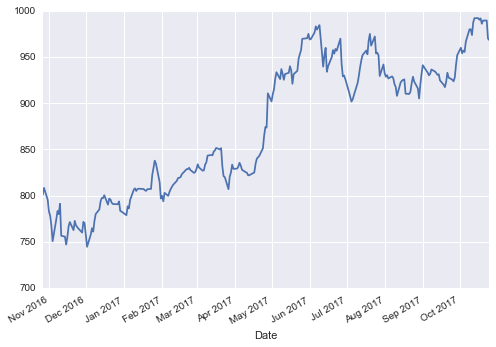

In [252]:
goog.plot()

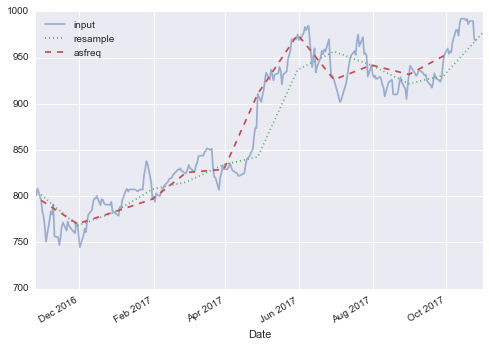

In [253]:
goog.plot(alpha=0.5, style='-')
goog.resample('BM').mean().plot(style=':')
goog.asfreq('BM').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')

Notice the difference:at each point,`resample()` reports the **average of the previous month**,while `asfreq()` reports the **value at the end of the month**

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

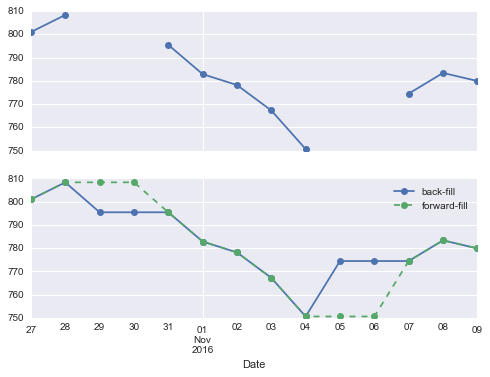

In [254]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### `shift()` and `tshift()`
`shift()` shifts the data,while `tshift()` shifts the index.

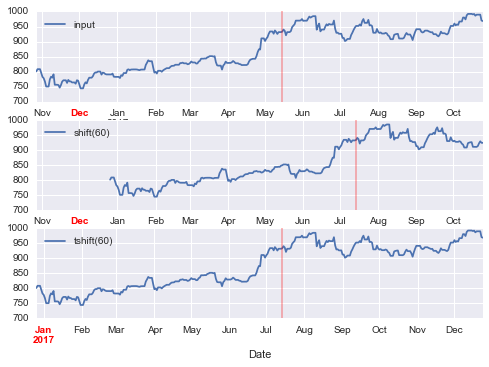

In [261]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(60).plot(ax=ax[1])
goog.tshift(60).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2017-05-15')
offset = pd.Timedelta(60, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(60)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(60)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

### `Rolling()`

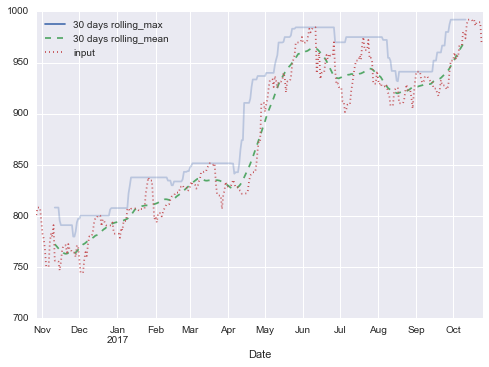

In [264]:
rolling = goog.rolling(30, center=True)

data = pd.DataFrame({'input': goog,
                     '30 days rolling_mean': rolling.mean(),
                     '30 days rolling_max': rolling.max()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# regression
```python
import statsmodel.api as sm

X=sm.add_constant(factors)
```

# system

## get local vars

`locals().keys()`

## how to pass parameter
```python
def func(parameter):
    p=parameter or 0
    return p
```

# Visualization

## `set_style()`
```python
import seaborn as sns
sns.set()
```
or
```python
sns.set_style('dark')
```

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

c:\python27\lib\site-packages\matplotlib\__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [157]:
import os
if not os.path.exists('figures'):
    os.makedirs('figures')

## Broadcasting

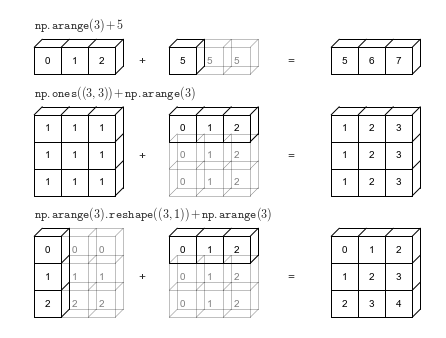

In [158]:
# Adapted from astroML: see http://www.astroml.org/book_figures/appendix/fig_broadcast_visual.html
import numpy as np
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Draw a figure and axis with no boundary
fig = plt.figure(figsize=(6, 4.5), facecolor='w')
ax = plt.axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)


def draw_cube(ax, xy, size, depth=0.4,
              edges=None, label=None, label_kwargs=None, **kwargs):
    """draw and label a cube.  edges is a list of numbers between
    1 and 12, specifying which of the 12 cube edges to draw"""
    if edges is None:
        edges = range(1, 13)

    x, y = xy

    if 1 in edges:
        ax.plot([x, x + size],
                [y + size, y + size], **kwargs)
    if 2 in edges:
        ax.plot([x + size, x + size],
                [y, y + size], **kwargs)
    if 3 in edges:
        ax.plot([x, x + size],
                [y, y], **kwargs)
    if 4 in edges:
        ax.plot([x, x],
                [y, y + size], **kwargs)

    if 5 in edges:
        ax.plot([x, x + depth],
                [y + size, y + depth + size], **kwargs)
    if 6 in edges:
        ax.plot([x + size, x + size + depth],
                [y + size, y + depth + size], **kwargs)
    if 7 in edges:
        ax.plot([x + size, x + size + depth],
                [y, y + depth], **kwargs)
    if 8 in edges:
        ax.plot([x, x + depth],
                [y, y + depth], **kwargs)

    if 9 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth + size, y + depth + size], **kwargs)
    if 10 in edges:
        ax.plot([x + depth + size, x + depth + size],
                [y + depth, y + depth + size], **kwargs)
    if 11 in edges:
        ax.plot([x + depth, x + depth + size],
                [y + depth, y + depth], **kwargs)
    if 12 in edges:
        ax.plot([x + depth, x + depth],
                [y + depth, y + depth + size], **kwargs)

    if label:
        if label_kwargs is None:
            label_kwargs = {}
        ax.text(x + 0.5 * size, y + 0.5 * size, label,
                ha='center', va='center', **label_kwargs)

solid = dict(c='black', ls='-', lw=1,
             label_kwargs=dict(color='k'))
dotted = dict(c='black', ls='-', lw=0.5, alpha=0.5,
              label_kwargs=dict(color='gray'))
depth = 0.3

#------------------------------------------------------------
# Draw top operation: vector plus scalar
draw_cube(ax, (1, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (2, 10), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 10), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '5', **solid)
draw_cube(ax, (7, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)
draw_cube(ax, (8, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '5', **dotted)

draw_cube(ax, (12, 10), 1, depth, [1, 2, 3, 4, 5, 6, 9], '5', **solid)
draw_cube(ax, (13, 10), 1, depth, [1, 2, 3, 6, 9], '6', **solid)
draw_cube(ax, (14, 10), 1, depth, [1, 2, 3, 6, 7, 9, 10], '7', **solid)

ax.text(5, 10.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 10.5, '=', size=12, ha='center', va='center')
ax.text(1, 11.5, r'${\tt np.arange(3) + 5}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw middle operation: matrix plus vector

# first block
draw_cube(ax, (1, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (2, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (3, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '1', **solid)

draw_cube(ax, (1, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 6.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 6.5), 1, depth, [2, 3, 7, 10], '1', **solid)

draw_cube(ax, (1, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (2, 5.5), 1, depth, [2, 3], '1', **solid)
draw_cube(ax, (3, 5.5), 1, depth, [2, 3, 7, 10], '1', **solid)

# second block
draw_cube(ax, (6, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 7.5), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 6.5), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 6.5), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 5.5), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 5.5), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 5.5), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 7.5), 1, depth, [1, 2, 3, 4, 5, 6, 9], '1', **solid)
draw_cube(ax, (13, 7.5), 1, depth, [1, 2, 3, 6, 9], '2', **solid)
draw_cube(ax, (14, 7.5), 1, depth, [1, 2, 3, 6, 7, 9, 10], '3', **solid)

draw_cube(ax, (12, 6.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 6.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 6.5), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 5.5), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 5.5), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 5.5), 1, depth, [2, 3, 7, 10], '3', **solid)

ax.text(5, 7.0, '+', size=12, ha='center', va='center')
ax.text(10.5, 7.0, '=', size=12, ha='center', va='center')
ax.text(1, 9.0, r'${\tt np.ones((3,\, 3)) + np.arange(3)}$',
        size=12, ha='left', va='bottom')

#------------------------------------------------------------
# Draw bottom operation: vector plus vector, double broadcast

# first block
draw_cube(ax, (1, 3), 1, depth, [1, 2, 3, 4, 5, 6, 7, 9, 10], '0', **solid)
draw_cube(ax, (1, 2), 1, depth, [2, 3, 4, 7, 10], '1', **solid)
draw_cube(ax, (1, 1), 1, depth, [2, 3, 4, 7, 10], '2', **solid)

draw_cube(ax, (2, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (2, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (2, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

draw_cube(ax, (3, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10, 11], '0', **dotted)
draw_cube(ax, (3, 2), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (3, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# second block
draw_cube(ax, (6, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (7, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (8, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (6, 2), 1, depth, range(2, 13), '0', **dotted)
draw_cube(ax, (7, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '1', **dotted)
draw_cube(ax, (8, 2), 1, depth, [2, 3, 6, 7, 9, 10, 11], '2', **dotted)

draw_cube(ax, (6, 1), 1, depth, [2, 3, 4, 7, 8, 10, 11, 12], '0', **dotted)
draw_cube(ax, (7, 1), 1, depth, [2, 3, 7, 10, 11], '1', **dotted)
draw_cube(ax, (8, 1), 1, depth, [2, 3, 7, 10, 11], '2', **dotted)

# third block
draw_cube(ax, (12, 3), 1, depth, [1, 2, 3, 4, 5, 6, 9], '0', **solid)
draw_cube(ax, (13, 3), 1, depth, [1, 2, 3, 6, 9], '1', **solid)
draw_cube(ax, (14, 3), 1, depth, [1, 2, 3, 6, 7, 9, 10], '2', **solid)

draw_cube(ax, (12, 2), 1, depth, [2, 3, 4], '1', **solid)
draw_cube(ax, (13, 2), 1, depth, [2, 3], '2', **solid)
draw_cube(ax, (14, 2), 1, depth, [2, 3, 7, 10], '3', **solid)

draw_cube(ax, (12, 1), 1, depth, [2, 3, 4], '2', **solid)
draw_cube(ax, (13, 1), 1, depth, [2, 3], '3', **solid)
draw_cube(ax, (14, 1), 1, depth, [2, 3, 7, 10], '4', **solid)

ax.text(5, 2.5, '+', size=12, ha='center', va='center')
ax.text(10.5, 2.5, '=', size=12, ha='center', va='center')
ax.text(1, 4.5, r'${\tt np.arange(3).reshape((3,\, 1)) + np.arange(3)}$',
        ha='left', size=12, va='bottom')

ax.set_xlim(0, 16)
ax.set_ylim(0.5, 12.5)

fig.savefig('figures/02.05-broadcasting.png')

## Split-Apply-Combine

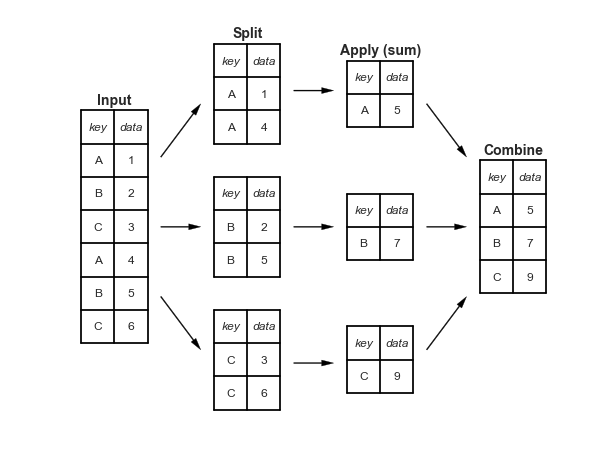

In [164]:

def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None,
                   textstyle=None):
    loc = loc or [0, 0]
    width = width or 1

    x, y = loc

    if ax is None:
        ax = plt.gca()

    ncols = len(df.columns) + 1
    nrows = len(df.index) + 1

    dx = dy = width*1.0 / ncols

    if linestyle is None:
        linestyle = {'color':'black'}

    if textstyle is None:
        textstyle = {'size': 12}

    textstyle.update({'ha':'center', 'va':'center'})

    # draw vertical lines
    for i in range(ncols + 1):
        plt.plot(2 * [x + i * dx], [y, y + dy * nrows], **linestyle)

    # draw horizontal lines
    for i in range(nrows + 1):
        plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

    # Create index labels
    for i in range(nrows - 1):
        plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
                 str(df.index[::-1][i]), **textstyle)

    # Create column labels
    for i in range(ncols - 1):
        plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
                 str(df.columns[i]), style='italic', **textstyle)
        
    # Add index label
    if df.index.name:
        plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
                 str(df.index.name), style='italic', **textstyle)

    # Insert data
    for i in range(nrows - 1):
        for j in range(ncols - 1):
            plt.text(x + (j + 1.5) * dx,
                     y + (i + 0.5) * dy,
                     str(df.values[::-1][i, j]), **textstyle)


#----------------------------------------------------------
# Draw figure

import pandas as pd
df = pd.DataFrame({'data': [1, 2, 3, 4, 5, 6]},
                   index=['A', 'B', 'C', 'A', 'B', 'C'])
df.index.name = 'key'


fig = plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.axes([0, 0, 1, 1])

ax.axis('off')

draw_dataframe(df, [0, 0])

for y, ind in zip([3, 1, -1], 'ABC'):
    split = df[df.index == ind]
    draw_dataframe(split, [2, y])

    sum = pd.DataFrame(split.sum()).T
    sum.index = [ind]
    sum.index.name = 'key'
    sum.columns = ['data']
    draw_dataframe(sum, [4, y + 0.25])
    
result = df.groupby(df.index).sum()
draw_dataframe(result, [6, 0.75])

style = dict(fontsize=14, ha='center', weight='bold')
plt.text(0.5, 3.6, "Input", **style)
plt.text(2.5, 4.6, "Split", **style)
plt.text(4.5, 4.35, "Apply (sum)", **style)
plt.text(6.5, 2.85, "Combine", **style)

arrowprops = dict(facecolor='black', width=1, headwidth=6)
plt.annotate('', (1.8, 3.6), (1.2, 2.8), arrowprops=arrowprops)
plt.annotate('', (1.8, 1.75), (1.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (1.8, -0.1), (1.2, 0.7), arrowprops=arrowprops)

plt.annotate('', (3.8, 3.8), (3.2, 3.8), arrowprops=arrowprops)
plt.annotate('', (3.8, 1.75), (3.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (3.8, -0.3), (3.2, -0.3), arrowprops=arrowprops)

plt.annotate('', (5.8, 2.8), (5.2, 3.6), arrowprops=arrowprops)
plt.annotate('', (5.8, 1.75), (5.2, 1.75), arrowprops=arrowprops)
plt.annotate('', (5.8, 0.7), (5.2, -0.1), arrowprops=arrowprops)
    
plt.axis('equal')
plt.ylim(-1.5, 5);

fig.savefig('figures/03.08-split-apply-combine.png')

## classification example figures

In [165]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

In [166]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)

# create some new points to predict
X2, _ = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.80)
X2 = X2[50:]

# predict the labels
y2 = clf.predict(X2)

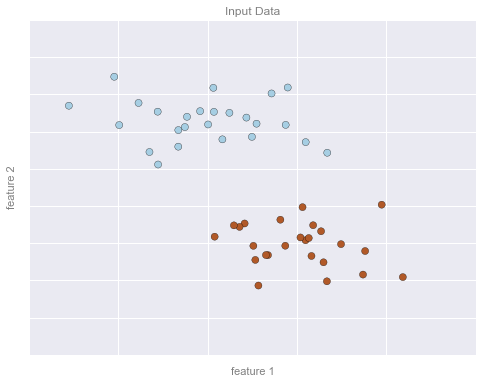

In [167]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)

# format plot
format_plot(ax, 'Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('figures/05.01-classification-1.png')

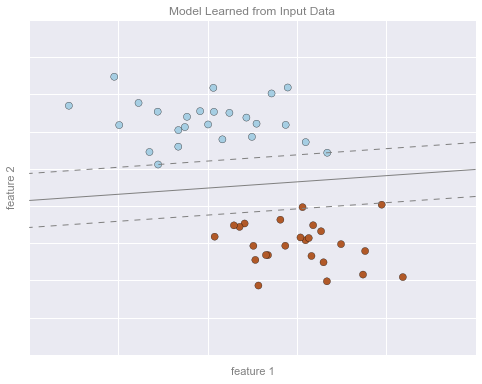

In [168]:
# Get contours describing the model
xx = np.linspace(-1, 4, 10)
yy = np.linspace(-2, 7, 10)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([clf.decision_function([t])
              for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)

# plot points and model
fig, ax = plt.subplots(figsize=(8, 6))
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)
ax.contour(xy1, xy2, Z, **line_style)

# format plot
format_plot(ax, 'Model Learned from Input Data')
ax.axis([-1, 4, -2, 7])

fig.savefig('figures/05.01-classification-2.png')

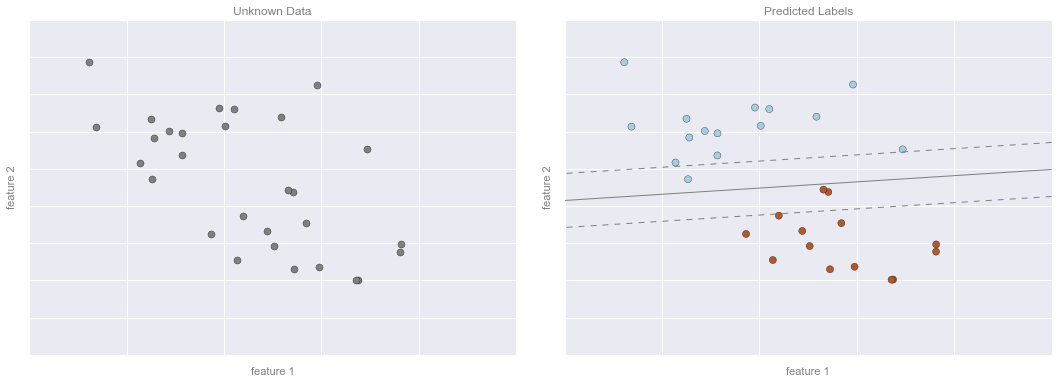

In [169]:
# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', **point_style)
ax[0].axis([-1, 4, -2, 7])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, **point_style)
ax[1].contour(xy1, xy2, Z, **line_style)
ax[1].axis([-1, 4, -2, 7])

format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

fig.savefig('figures/05.01-classification-3.png')

## Regression example figures

In [170]:
from sklearn.linear_model import LinearRegression

# Create some data for the regression
rng = np.random.RandomState(1)

X = rng.randn(200, 2)
y = np.dot(X, [-2, 1]) + 0.1 * rng.randn(X.shape[0])

# fit the regression model
model = LinearRegression()
model.fit(X, y)

# create some new points to predict
X2 = rng.randn(100, 2)

# predict the labels
y2 = model.predict(X2)

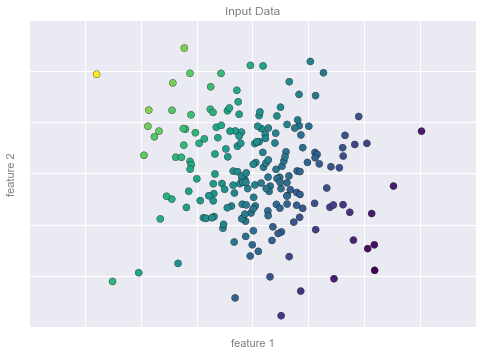

In [171]:
# plot data points
fig, ax = plt.subplots()
points = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                    cmap='viridis')

# format plot
format_plot(ax, 'Input Data')
ax.axis([-4, 4, -3, 3])

fig.savefig('figures/05.01-regression-1.png')

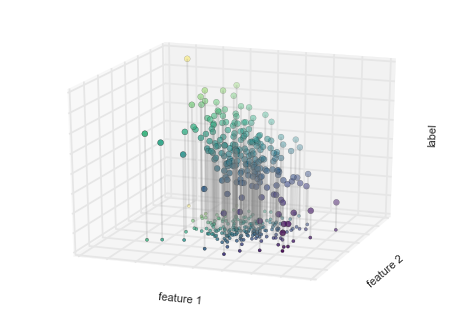

In [172]:
from mpl_toolkits.mplot3d.art3d import Line3DCollection

points = np.hstack([X, y[:, None]]).reshape(-1, 1, 3)
segments = np.hstack([points, points])
segments[:, 0, 2] = -8

# plot points in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, s=35,
           cmap='viridis')
ax.add_collection3d(Line3DCollection(segments, colors='gray', alpha=0.2))
ax.scatter(X[:, 0], X[:, 1], -8 + np.zeros(X.shape[0]), c=y, s=10,
           cmap='viridis')

# format plot
ax.patch.set_facecolor('white')
ax.view_init(elev=20, azim=-70)
ax.set_zlim3d(-8, 8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.zaxis.set_major_formatter(plt.NullFormatter())
ax.set(xlabel='feature 1', ylabel='feature 2', zlabel='label')

# Hide axes (is there a better way?)
ax.w_xaxis.line.set_visible(False)
ax.w_yaxis.line.set_visible(False)
ax.w_zaxis.line.set_visible(False)
for tick in ax.w_xaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_yaxis.get_ticklines():
    tick.set_visible(False)
for tick in ax.w_zaxis.get_ticklines():
    tick.set_visible(False)

fig.savefig('figures/05.01-regression-2.png')

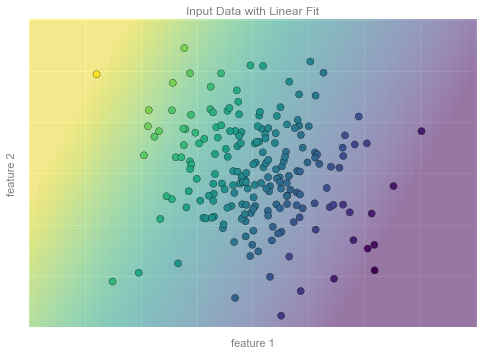

In [173]:
from matplotlib.collections import LineCollection

# plot data points
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y, s=50,
                 cmap='viridis', zorder=2)

# compute and plot model color mesh
xx, yy = np.meshgrid(np.linspace(-4, 4),
                     np.linspace(-3, 3))
Xfit = np.vstack([xx.ravel(), yy.ravel()]).T
yfit = model.predict(Xfit)
zz = yfit.reshape(xx.shape)
ax.pcolorfast([-4, 4], [-3, 3], zz, alpha=0.5,
              cmap='viridis', norm=pts.norm, zorder=1)

# format plot
format_plot(ax, 'Input Data with Linear Fit')
ax.axis([-4, 4, -3, 3])

fig.savefig('figures/05.01-regression-3.png')

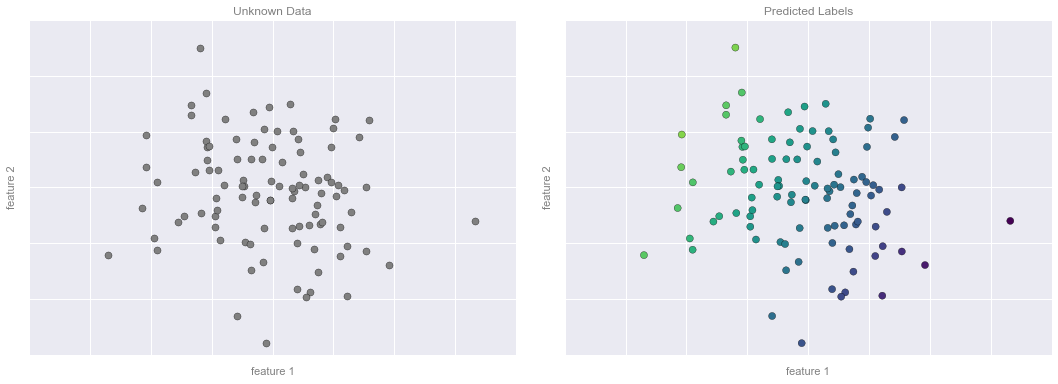

In [174]:
# plot the model fit
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X2[:, 0], X2[:, 1], c='gray', s=50)
ax[0].axis([-4, 4, -3, 3])

ax[1].scatter(X2[:, 0], X2[:, 1], c=y2, s=50,
              cmap='viridis', norm=pts.norm)
ax[1].axis([-4, 4, -3, 3])

# format plots
format_plot(ax[0], 'Unknown Data')
format_plot(ax[1], 'Predicted Labels')

fig.savefig('figures/05.01-regression-4.png')

## Clustering Example figures

In [175]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

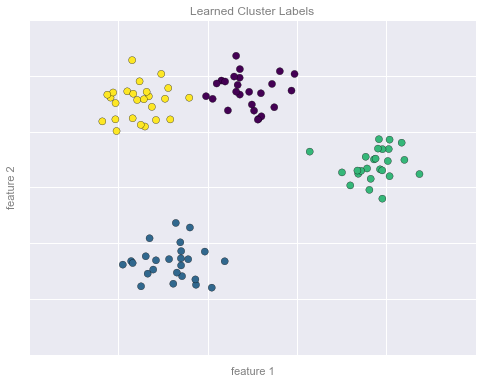

In [177]:
# plot the data with cluster labels
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')

fig.savefig('figures/05.01-clustering-2.png')

## Dimensionality Reduction Example Figures

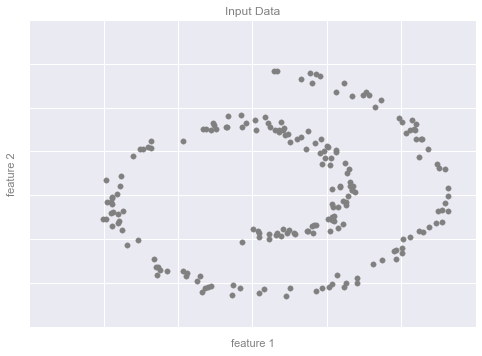

In [179]:
from sklearn.datasets import make_swiss_roll

# make data
X, y = make_swiss_roll(200, noise=0.5, random_state=42)
X = X[:, [0, 2]]

# visualize data
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color='gray', s=30)

# format the plot
format_plot(ax, 'Input Data')

fig.savefig('figures/05.01-dimesionality-1.png')

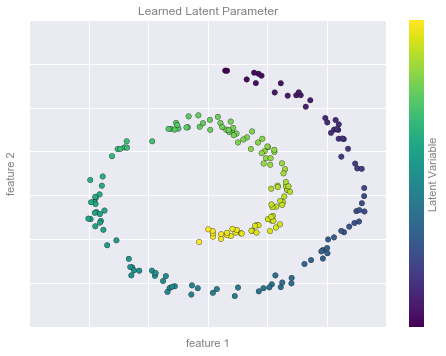

In [180]:
from sklearn.manifold import Isomap

model = Isomap(n_neighbors=8, n_components=1)
y_fit = model.fit_transform(X).ravel()

# visualize data
fig, ax = plt.subplots()
pts = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='viridis', s=30)
cb = fig.colorbar(pts, ax=ax)

# format the plot
format_plot(ax, 'Learned Latent Parameter')
cb.set_ticks([])
cb.set_label('Latent Variable', color='gray')

fig.savefig('figures/05.01-dimesionality-2.png')

## Features and Labels Grid

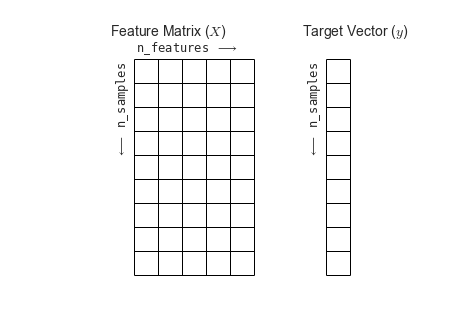

In [181]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)

fig.savefig('figures/05.02-samples-features.png')

## Cross-Validation Figures

In [183]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

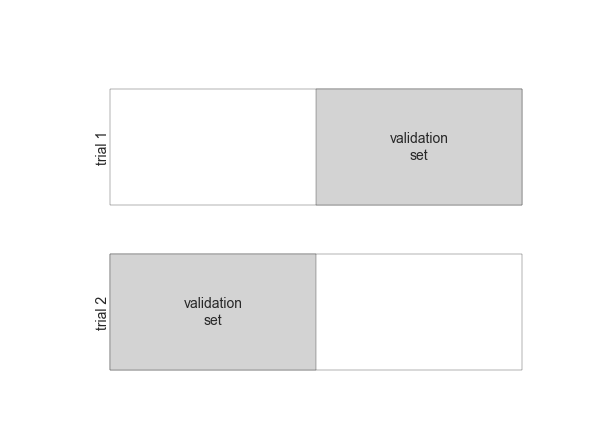

In [184]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(2, ax, textprop=dict(size=14))

fig.savefig('figures/05.03-2-fold-CV.png')

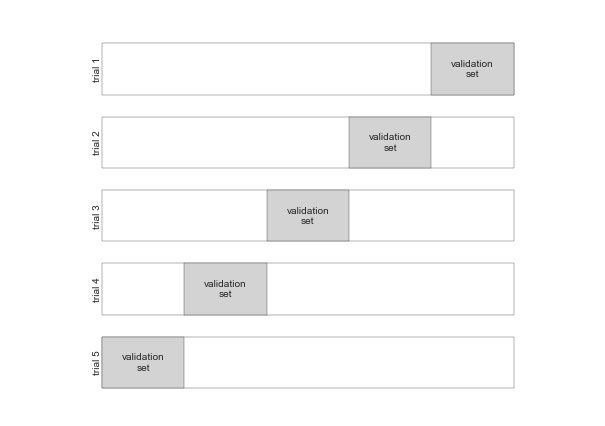

In [185]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(5, ax, textprop=dict(size=10))

fig.savefig('figures/05.03-5-fold-CV.png')

## Overfitting and Underfitting

In [186]:
import numpy as np

def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [187]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

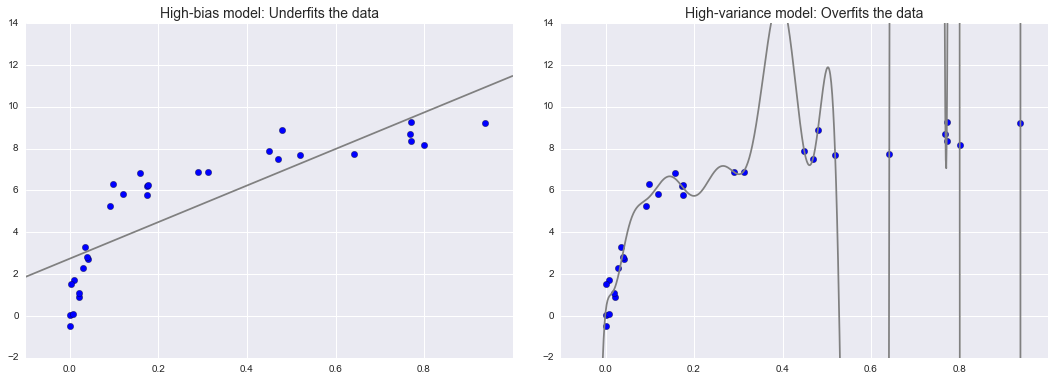

In [188]:
X, y = make_data()
xfit = np.linspace(-0.1, 1.0, 1000)[:, None]
model1 = PolynomialRegression(1).fit(X, y)
model20 = PolynomialRegression(20).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

ax[0].scatter(X.ravel(), y, s=40)
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)

ax[1].scatter(X.ravel(), y, s=40)
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)

fig.savefig('figures/05.03-bias-variance.png')

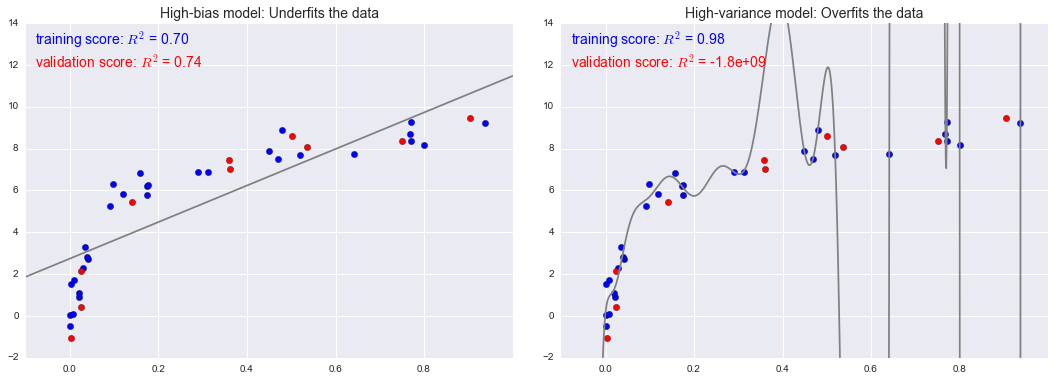

In [189]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

X2, y2 = make_data(10, rseed=42)

ax[0].scatter(X.ravel(), y, s=40, c='blue')
ax[0].plot(xfit.ravel(), model1.predict(xfit), color='gray')
ax[0].axis([-0.1, 1.0, -2, 14])
ax[0].set_title('High-bias model: Underfits the data', size=14)
ax[0].scatter(X2.ravel(), y2, s=40, c='red')
ax[0].text(0.02, 0.98, "training score: $R^2$ = {0:.2f}".format(model1.score(X, y)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='blue')
ax[0].text(0.02, 0.91, "validation score: $R^2$ = {0:.2f}".format(model1.score(X2, y2)),
           ha='left', va='top', transform=ax[0].transAxes, size=14, color='red')

ax[1].scatter(X.ravel(), y, s=40, c='blue')
ax[1].plot(xfit.ravel(), model20.predict(xfit), color='gray')
ax[1].axis([-0.1, 1.0, -2, 14])
ax[1].set_title('High-variance model: Overfits the data', size=14)
ax[1].scatter(X2.ravel(), y2, s=40, c='red')
ax[1].text(0.02, 0.98, "training score: $R^2$ = {0:.2g}".format(model20.score(X, y)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='blue')
ax[1].text(0.02, 0.91, "validation score: $R^2$ = {0:.2g}".format(model20.score(X2, y2)),
           ha='left', va='top', transform=ax[1].transAxes, size=14, color='red')

fig.savefig('figures/05.03-bias-variance-2.png')

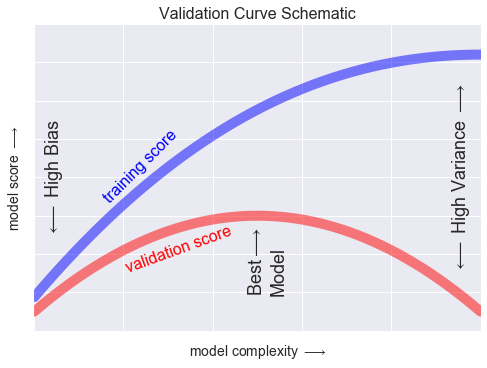

In [190]:
x = np.linspace(0, 1, 1000)
y1 = -(x - 0.5) ** 2
y2 = y1 - 0.33 + np.exp(x - 1)

fig, ax = plt.subplots()
ax.plot(x, y2, lw=10, alpha=0.5, color='blue')
ax.plot(x, y1, lw=10, alpha=0.5, color='red')

ax.text(0.15, 0.2, "training score", rotation=45, size=16, color='blue')
ax.text(0.2, -0.05, "validation score", rotation=20, size=16, color='red')

ax.text(0.02, 0.1, r'$\longleftarrow$ High Bias', size=18, rotation=90, va='center')
ax.text(0.98, 0.1, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.48, -0.12, 'Best$\\longrightarrow$\nModel', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(-0.3, 0.5)

ax.set_xlabel(r'model complexity $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Validation Curve Schematic", size=16)

fig.savefig('figures/05.03-validation-curve.png')

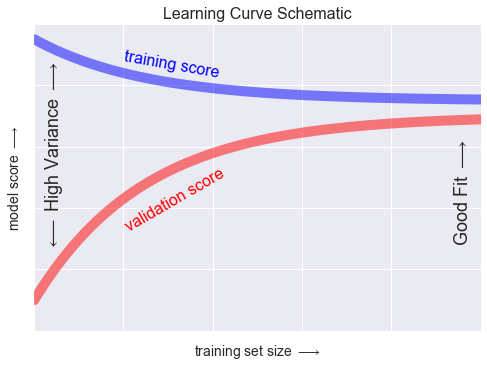

In [191]:
N = np.linspace(0, 1, 1000)
y1 = 0.75 + 0.2 * np.exp(-4 * N)
y2 = 0.7 - 0.6 * np.exp(-4 * N)

fig, ax = plt.subplots()
ax.plot(x, y1, lw=10, alpha=0.5, color='blue')
ax.plot(x, y2, lw=10, alpha=0.5, color='red')

ax.text(0.2, 0.88, "training score", rotation=-10, size=16, color='blue')
ax.text(0.2, 0.5, "validation score", rotation=30, size=16, color='red')

ax.text(0.98, 0.45, r'Good Fit $\longrightarrow$', size=18, rotation=90, ha='right', va='center')
ax.text(0.02, 0.57, r'$\longleftarrow$ High Variance $\longrightarrow$', size=18, rotation=90, va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.set_xlabel(r'training set size $\longrightarrow$', size=14)
ax.set_ylabel(r'model score $\longrightarrow$', size=14)

ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())

ax.set_title("Learning Curve Schematic", size=16)

fig.savefig('figures/05.03-learning-curve.png')

## Gaussian Naive Bayes

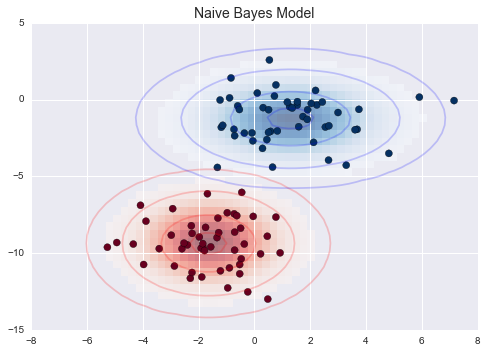

In [192]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

fig.savefig('figures/05.05-gaussian-NB.png')

## Linear Regression

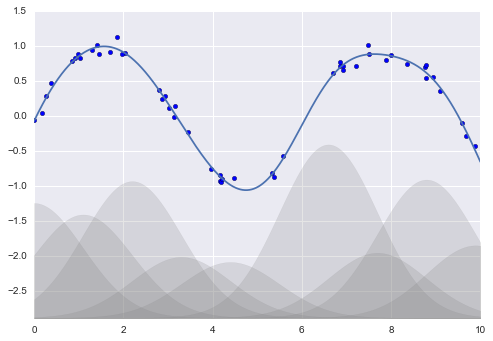

In [193]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly-spaced Gaussian Features for 1D input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

gauss_model = make_pipeline(GaussianFeatures(10, 1.0),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

gf = gauss_model.named_steps['gaussianfeatures']
lm = gauss_model.named_steps['linearregression']

fig, ax = plt.subplots()

for i in range(10):
    selector = np.zeros(10)
    selector[i] = 1
    Xfit = gf.transform(xfit[:, None]) * selector
    yfit = lm.predict(Xfit)
    ax.fill_between(xfit, yfit.min(), yfit, color='gray', alpha=0.2)

ax.scatter(x, y)
ax.plot(xfit, gauss_model.predict(xfit[:, np.newaxis]))
ax.set_xlim(0, 10)
ax.set_ylim(yfit.min(), 1.5)

fig.savefig('figures/05.06-gaussian-basis.png')

## Random Forests

In [194]:
%%file helpers_05_08.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

Writing helpers_05_08.py


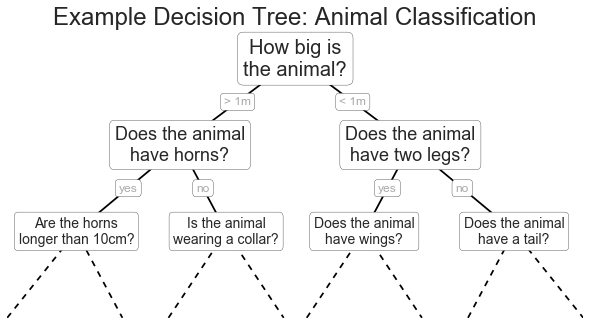

In [195]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 0.8, 1], frameon=False, xticks=[], yticks=[])
ax.set_title('Example Decision Tree: Animal Classification', size=24)

def text(ax, x, y, t, size=20, **kwargs):
    ax.text(x, y, t,
            ha='center', va='center', size=size,
            bbox=dict(boxstyle='round', ec='k', fc='w'), **kwargs)

text(ax, 0.5, 0.9, "How big is\nthe animal?", 20)
text(ax, 0.3, 0.6, "Does the animal\nhave horns?", 18)
text(ax, 0.7, 0.6, "Does the animal\nhave two legs?", 18)
text(ax, 0.12, 0.3, "Are the horns\nlonger than 10cm?", 14)
text(ax, 0.38, 0.3, "Is the animal\nwearing a collar?", 14)
text(ax, 0.62, 0.3, "Does the animal\nhave wings?", 14)
text(ax, 0.88, 0.3, "Does the animal\nhave a tail?", 14)

text(ax, 0.4, 0.75, "> 1m", 12, alpha=0.4)
text(ax, 0.6, 0.75, "< 1m", 12, alpha=0.4)

text(ax, 0.21, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.34, 0.45, "no", 12, alpha=0.4)

text(ax, 0.66, 0.45, "yes", 12, alpha=0.4)
text(ax, 0.79, 0.45, "no", 12, alpha=0.4)

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '--k')
ax.plot([0.28, 0.38, 0.48], [0.0, 0.3, 0.0], '--k')
ax.plot([0.52, 0.62, 0.72], [0.0, 0.3, 0.0], '--k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '--k')
ax.axis([0, 1, 0, 1])

fig.savefig('figures/05.08-decision-tree.png')

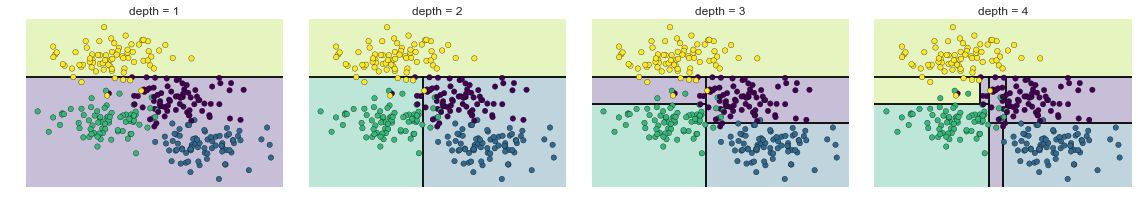

In [196]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

fig.savefig('figures/05.08-decision-tree-levels.png')

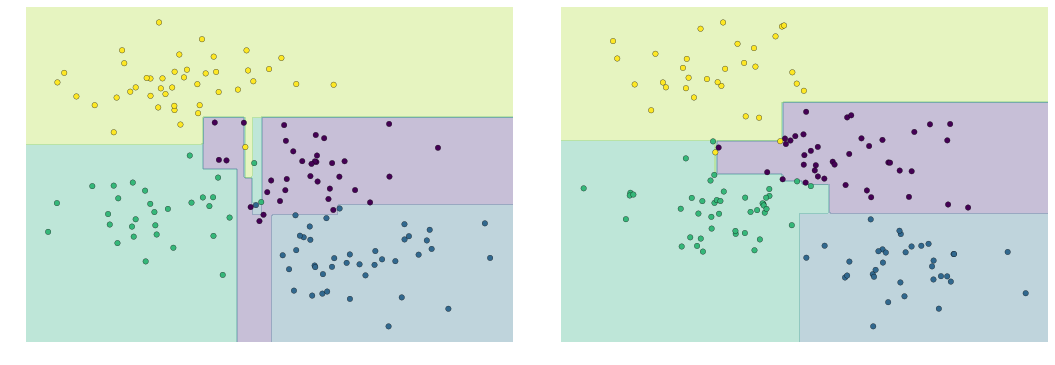

In [197]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

fig.savefig('figures/05.08-decision-tree-overfitting.png')

## Principal Component Analysis

In [198]:
from sklearn.decomposition import PCA

In [199]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

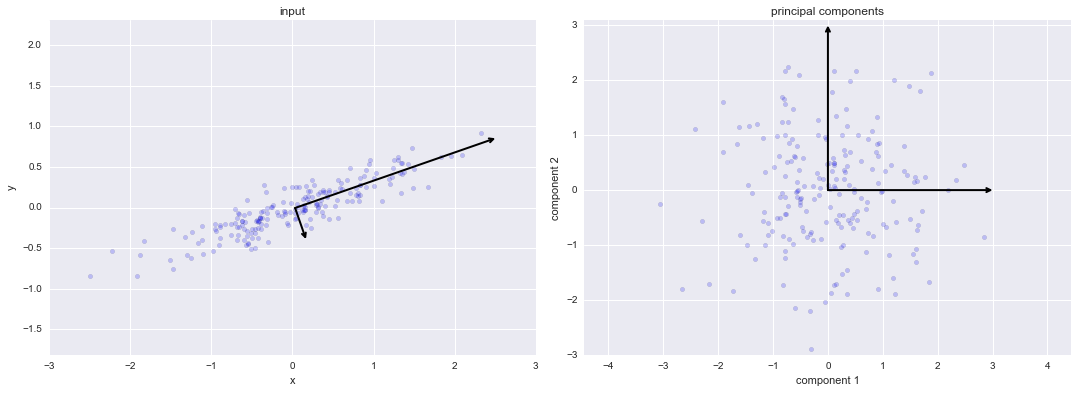

In [200]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

fig.savefig('figures/05.09-PCA-rotation.png')

In [201]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

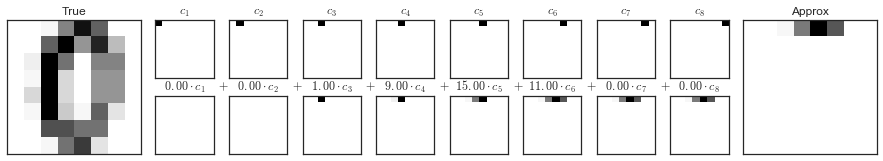

In [202]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

fig.savefig('figures/05.09-digits-pixel-components.png')

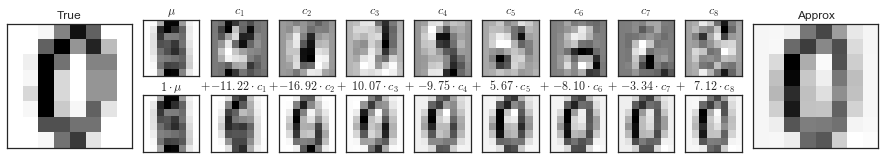

In [203]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

fig.savefig('figures/05.09-digits-pca-components.png')

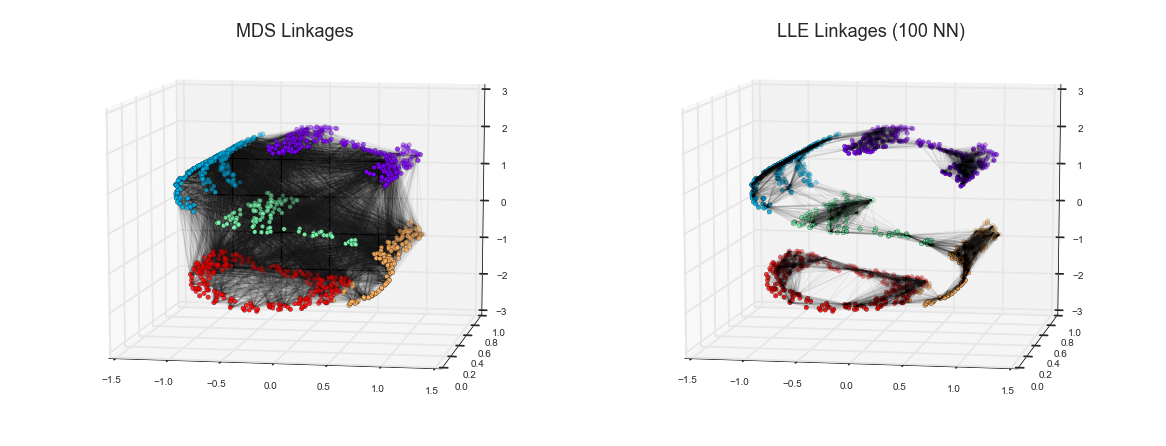

In [204]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as png
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

X = make_hello(1000)
XS = make_hello_s_curve(X)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

from mpl_toolkits.mplot3d.art3d import Line3DCollection
from sklearn.neighbors import NearestNeighbors

# construct lines for MDS
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
lines_MDS = [(XS[i], XS[j]) for i in ind[:100] for j in ind[100:200]]

# construct lines for LLE
nbrs = NearestNeighbors(n_neighbors=100).fit(XS).kneighbors(XS[ind[:100]])[1]
lines_LLE = [(XS[ind[i]], XS[j]) for i in range(100) for j in nbrs[i]]
titles = ['MDS Linkages', 'LLE Linkages (100 NN)']

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(projection='3d', axisbg='none'))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)

for axi, title, lines in zip(ax, titles, [lines_MDS, lines_LLE]):
    axi.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize);
    axi.add_collection(Line3DCollection(lines, lw=1, color='black',
                                        alpha=0.05))
    axi.view_init(elev=10, azim=-80)
    axi.set_title(title, size=18)

fig.savefig('figures/05.10-LLE-vs-MDS.png')

## K-Means

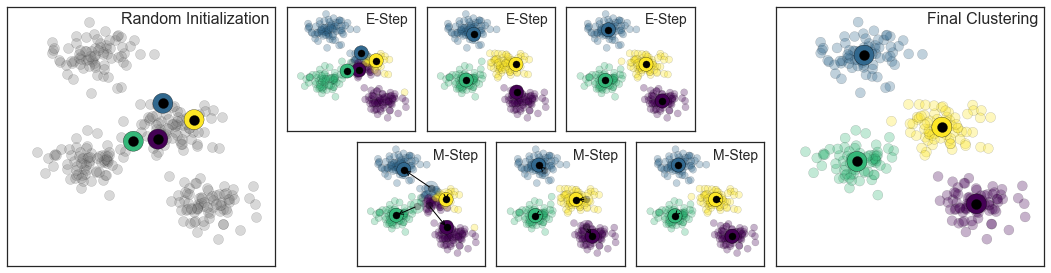

In [205]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)


fig.savefig('figures/05.11-expectation-maximization.png')

## Gaussian Mixture Models

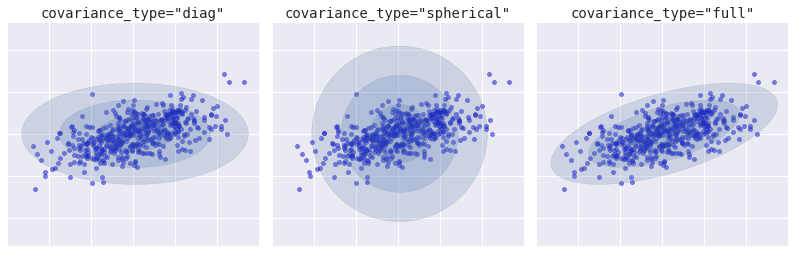

In [209]:
from sklearn.mixture import GMM

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05)

rng = np.random.RandomState(5)
X = np.dot(rng.randn(500, 2), rng.randn(2, 2))

for i, cov_type in enumerate(['diag', 'spherical', 'full']):
    model = GMM(1, covariance_type=cov_type).fit(X)
    ax[i].axis('equal')
    ax[i].scatter(X[:, 0], X[:, 1], alpha=0.5)
    ax[i].set_xlim(-3, 3)
    ax[i].set_title('covariance_type="{0}"'.format(cov_type),
                    size=14, family='monospace')
    draw_ellipse(model.means_[0], model.covars_[0], ax[i], alpha=0.2)
    ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    ax[i].yaxis.set_major_formatter(plt.NullFormatter())

fig.savefig('figures/05.12-covariance-type.png')

# Jupyter
`!cmd` Execute cmd in the system shell

`output = !cmd args` Run cmd and store the stdout in output

`%bookmark` Utilize IPython's directory bookmarking system 

`cd directory` Change system working directory to passed directory



## Shortcuts
`ctrl+shift+p` to run any command by name.


`Esc` will take you into command mode where you can navigate around your notebook with arrow keys.

`shift+j` or `shift+down` selects multiple cells

## pretty display of variables
You can set the `ast_note_interactivity` kernel option to make jupyter display variables without the need for a print statement.

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
import pandas as pd
df=pd.DataFrame(range(5)*100)
df.head()
df.tail()

,0
0,0
1,1
2,2
3,3
4,4


,0
495,0
496,1
497,2
498,3
499,4


If you want to set this behavior for all instances of Jupyter(Notebook and Console),simply create a file `-/.ipython/profile_default/ipython_config.py`with the lines below.  
```
c=get_confit()

#run all nodes interactively
c.InteractiveShell.ast_node_interactivity='all'
```

## Easy links to documention
Inside the `help` menu you'll find handy links to the online documentation for common libraries including NumPy,Pandas,Scipy and Matplotlib.

Don't forget also that by preparing a library,method or variable with `?`,you can access the Docstring for quick reference on syntax.

In [5]:
?str.replace()

## Plotting in notebooks
`seaborn` is built over matplotlib and makes building more attractive plots easier.Just by importing Seaborn,your matplotlib plots are mode 'prettier' without any code modification.

## IPython magic commands

In [6]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%rub

refer to https://ipython.readthedocs.io/en/stable/interactive/magics.html

### %run:Execute python code
`%run` can execute python code from.py files-this is well-documented behavior.Lesser known is the fact that it can also execute other jupyter notebooks,which can be quite useful.

Note that using `%run` is not the same as importing a python module.

For example:  
`%run ./two-histograms.ipnb`


### %load:Insert the code from an external script

This will replace the contents of the cell with an external script.You can either use a file on your computer as a source,or alternatively a URL.  
For example:  
`%load ./hello_world.py`

### %store:Pass variables between notebooks
### %who:List all variables of global scope

In [7]:
one='for the money'
two='for the show'
three='to get ready now to go cat go'
%who str

one	 three	 two	 


### Timing
`%%time`  
`%timeit`

### %%writefile and %pycat
Using the `%%writefile` magic saves the contents of that cell to an external file.`%pycat` does the opposite,and shows you (in a popup) the syntax highlighted contents of an external file.


In [8]:
%%writefile pythoncode.py

import numpy as np
def append_if_not_exists(arr,x):
    if x not in arr:
    arr.append(x)

def some_useless_slow_function():
    arr=list()
    for x in range(10000):
        x=np.random.randint(0,10000)
        append_if_not_exists(arr,x)

Writing pythoncode.py


In [9]:
%pycat pythoncode.py

### %prun:Show how much time your program spent in each function

Using `prun statement_name`will give you an ordered table showing you the number of times each internal function was called within the statement,the time each call took as well as the cumulative time of all runs of the function.

In [10]:
import numpy as np
def append_if_not_exists(arr,x):
    if x not in arr:
        arr.append(x)

def some_useless_slow_function():
    arr=list()
    for x in range(10000):
        x=np.random.randint(0,10000)
        append_if_not_exists(arr,x)

In [11]:
%prun some_useless_slow_function()

## Debugging with %pdb
## Suppress the output of a final function
Sometimes it's handy to suppress the output of the function on a final line,for instance when plotting.To do this,you just add a semicolon at the end.

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt
x=np.linspace(0,1,1000)**1.5

(array([ 216.,  126.,  106.,   95.,   87.,   81.,   77.,   73.,   71.,   68.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

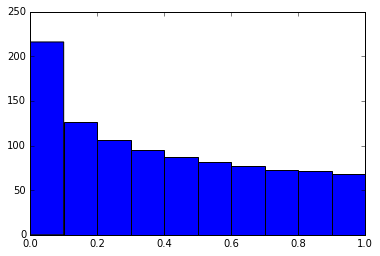

In [13]:
#Here you get the output of the function
plt.hist(x)

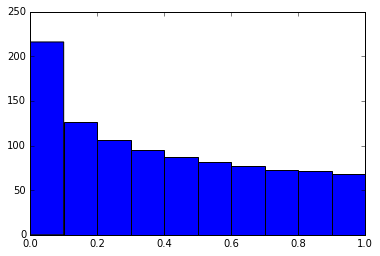

In [14]:
#By adding a semicolon at the end,the output is suppressed
plt.hist(x);

## Executing shell commands

In [15]:
!dir *.ipynb

 驱动器 C 中的卷是 Windows
 卷的序列号是 BC29-BDD2

 C:\Python27\zht\study\studyNotes 的目录

2017.10.29  01:16             4,468 cite2c-A jupyter extension for zotero.ipynb
2017.10.30  09:59         2,274,319 dataAnalysis_summary.ipynb
2017.10.25  22:11           354,705 Estimating Standard Errors in Python.ipynb
2017.10.30  09:24             2,787 gitStudyNotes.ipynb
2017.10.29  00:48             9,391 pelicanStudyNotes.ipynb
2017.10.29  21:22               556 test.ipynb
               6 个文件      2,646,226 字节
               0 个目录 32,720,678,912 可用字节


`!pip install packagename`

## Run code from a different kernel in a notebook
If you want to,you can combine codde from multiple kernels into one notebook.  
* `%%bash`
* `%%HTML`
* `%%python2`
* `%%python3`
* `%%ruby`
* `%%perl`

## Install other kernels for Jupyter
## Writing functions in other languages
```python
!pip install cython fortran-magic
%load_ext Cython
def myltiply_by_2(float x):
    return 2.0*x

myltiply_by_2(23.)

```
## Multicursor support
Simply click and drag your mouse while holding down `alt`.
## Jupyter-contrib extensions

## Create a presentation from a Jupyter notebook
Damian Avila's RISE allows you to create a powerpoint style presentation from an existing notebook.

`!pip install RISE`  

And then run the following code to install and enable the extension:  
```
jupyter-nbextension install rise --py --sys-prefix
jupyter-nbextension enable rise --py --sys-prefix
```
## The jupyter output system
Notebooks are displayed as HTML and the cell output can be HTML,so you can return virturally anything:video/autio/images.  

In this example I scan the folder with images in my repository and show thumbnails of the first 5:
```
import os
from IPython.display import display,Image
names=[f for f in os.listdir('../images')
for name in naems[:5]:
    display(Image('../images/'+name,width=100)
```